# Conversão de Função de Transferência Discreta para Continua

In [2]:
import sympy as sp
import control as ct
from IPython.display import display

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *
from sklearn.metrics import mean_squared_error
import scienceplots

#!pip install scienceplots

%config InlineBackend.figure_format='retina'
plt.style.use(["science", "notebook"])


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

$$\frac{-0.002414 z + 0.01115}{z^5 - 0.9485 z^4 - 0.3122 z^3 - 0.007337 z^2 + 0.1263 z + 0.1573}\quad dt = 0.02$$

In [3]:
num_z = np.array([-0.002414, 0.01115])
den_z = np.array([1, -0.9485, -0.3122, -0.007337, 0.1263, 0.1573])
Gz = ct.tf(num_z, den_z, 0.02)
Gz

TransferFunction(array([-0.002414,  0.01115 ]), array([ 1.      , -0.9485  , -0.3122  , -0.007337,  0.1263  ,  0.1573  ]), 0.02)

Método de Tustin

In [4]:
z, s, e = sp.symbols("z s e")

Ts = 0.02

z_ = (1 + s*Ts/2)/(1 - s*Ts/2)
z_

(0.01*s + 1)/(1 - 0.01*s)

In [5]:
num = -0.002414*z_ + 0.01115

den =  z_**5 - 0.9485*z_**4 - 0.3122*z_**3 - 0.007337*z_**2 + 0.1263*z_ + 0.1573

Gs_c = num.simplify()/den.simplify()
Gs_c.simplify()

(-1.3564e-14*s**6 + 7.6556e-12*s**5 - 1.7932e-9*s**4 + 2.23e-7*s**3 - 1.5518e-5*s**2 + 0.00057244*s - 0.008736)/(1.612637e-12*s**6 + 6.320926e-10*s**5 + 3.252763e-8*s**4 - 6.18652000000005e-7*s**3 - 0.0009883437*s**2 - 0.00668674000000001*s - 0.015563)

Podemos descartar os termos com coeficiente muito pequenos, assim, se obtêm:

$$\displaystyle \frac{0.00057244 s - 0.008736}{- 0.0009883437 s^{2} - 0.00668674000000001 s - 0.015563}$$

In [6]:
num_c = np.array([-0.008736])
den_c = np.array([-0.0009883437, -0.00668674000000001, -0.015563])
Gs = ct.tf(num_c, den_c)
Gs

TransferFunction(array([-0.008736]), array([-0.00098834, -0.00668674, -0.015563  ]))

# TESTE GS com contyrolador projetado Cs

#### Função de transferência MF sinal de saida

$$\frac{20.71 s^2 + 140.2 s + 326.2}{0.1131 s^4 + 2.576 s^3 + 34.74 s^2 + 168.7 s + 326.2}$$


#### Função de transferência MF sinal de controle
$$\frac{2.343 s^4 + 31.71 s^3 + 181.1 s^2 + 499.4 s + 581.1}{0.1131 s^4 + 2.576 s^3 + 34.74 s^2 + 168.7 s + 326.2}$$

In [33]:
num_c = np.array([20.71, 140.2, 326.2])
den_c = np.array([0.1131, 2.576, 34.74, 168.7, 326.2])
Gs_mf = ct.tf(num_c, den_c)
Gs_mf

TransferFunction(array([ 20.71, 140.2 , 326.2 ]), array([1.131e-01, 2.576e+00, 3.474e+01, 1.687e+02, 3.262e+02]))

In [34]:
num_ct = np.array([2.343, 31.71, 181.1, 499.4, 581.1])
den_ct = np.array([0.1131, 2.576, 34.74, 168.7, 326.2])
Cs_ct = ct.tf(num_ct, den_ct)
Cs_ct

TransferFunction(array([  2.343,  31.71 , 181.1  , 499.4  , 581.1  ]), array([1.131e-01, 2.576e+00, 3.474e+01, 1.687e+02, 3.262e+02]))

### Validação do modelo continuo obtido

In [8]:
# (url github) https://github.com/Oseiasdfarias/Projeto_Tcc_Oseias_Oficial/blob/main/interface_aeropendulo/interface/dados_de_ensaio/arquivo_25_6_2023_16_20_28.csv
file = "../../../interface_aeropendulo/src_interface/dados_de_ensaio/arquivo_9_9_2023_13_33_24.csv"
dados_malha_aberta = pd.read_csv(file, header=None, sep=',').values
dados_malha_aberta[0][0] = 0.0
dados_malha_aberta

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        6.0000e+00],
       [0.0000e+00, 0.0000e+00, 3.6066e+01, ..., 1.0000e+00, 1.0000e+00,
        3.9800e+00],
       [1.0000e+00, 0.0000e+00, 3.5934e+01, ..., 1.0000e+00, 1.0000e+00,
        4.0000e+00],
       ...,
       [4.0040e+03, 0.0000e+00, 3.6264e+01, ..., 1.3000e+00, 1.3000e+00,
        8.4058e+01],
       [4.0050e+03, 0.0000e+00, 3.6593e+01, ..., 1.3000e+00, 1.3000e+00,
        8.4078e+01],
       [4.0060e+03, 0.0000e+00, 3.6396e+01, ..., 1.3000e+00, 1.3000e+00,
        8.4098e+01]])

In [9]:
tempo = np.array(dados_malha_aberta[:,7])
sinal_prbs_entrada  = np.array(dados_malha_aberta[:,6])
sinal_saida = np.array(dados_malha_aberta[:,2])

# Convertendo o sinal de Graus para Radianos
sinal_saida = np.squeeze(np.deg2rad(sinal_saida))
tempo = tempo - min(tempo)

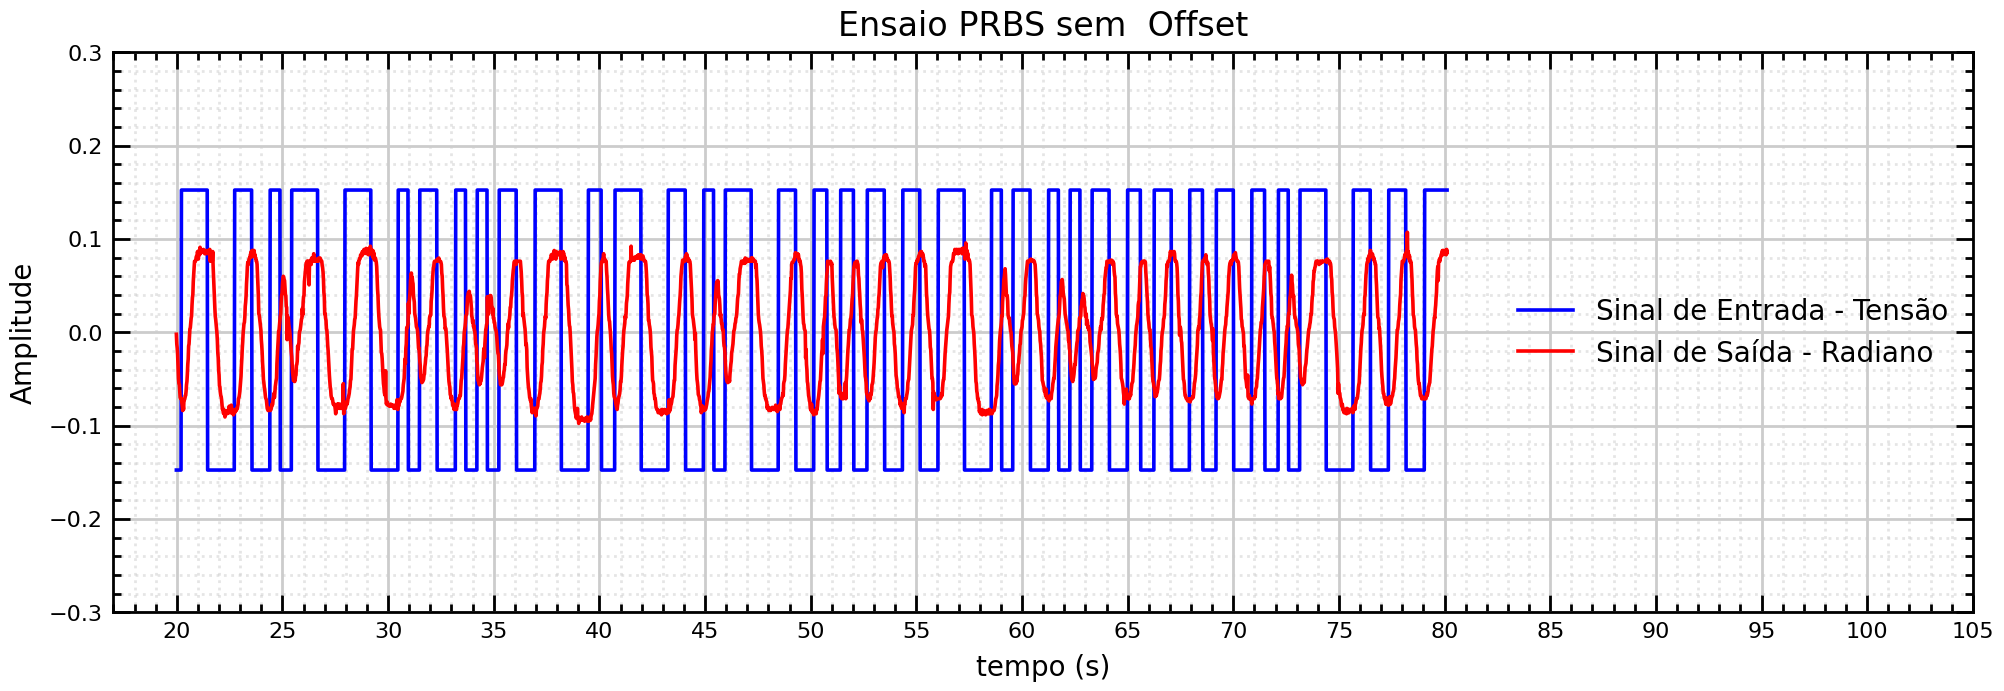

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(211)

init = 1000

plt.plot(tempo[init:], sinal_prbs_entrada[init:] - np.mean(sinal_prbs_entrada[50:]),
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[init:], (sinal_saida[init:]) - np.mean((sinal_saida[50:])),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")

plt. title('Ensaio PRBS sem  Offset', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10, loc='center right')
plt.yticks(np.arange(-0.3, 0.4, 0.1))
plt.xticks(np.arange(20, 110, 5))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

In [11]:
u1 = np.array(sinal_prbs_entrada[50:] - np.mean(sinal_prbs_entrada[50:]))
yout = np.array(sinal_saida[50:] - np.mean((sinal_saida[50:])))
t = np.array(tempo[50:])


In [12]:
t_t = np.linspace(t[0], t[-1], len(t))
_, yp_c = ct.forced_response(Gs, U=u1, T=t_t)

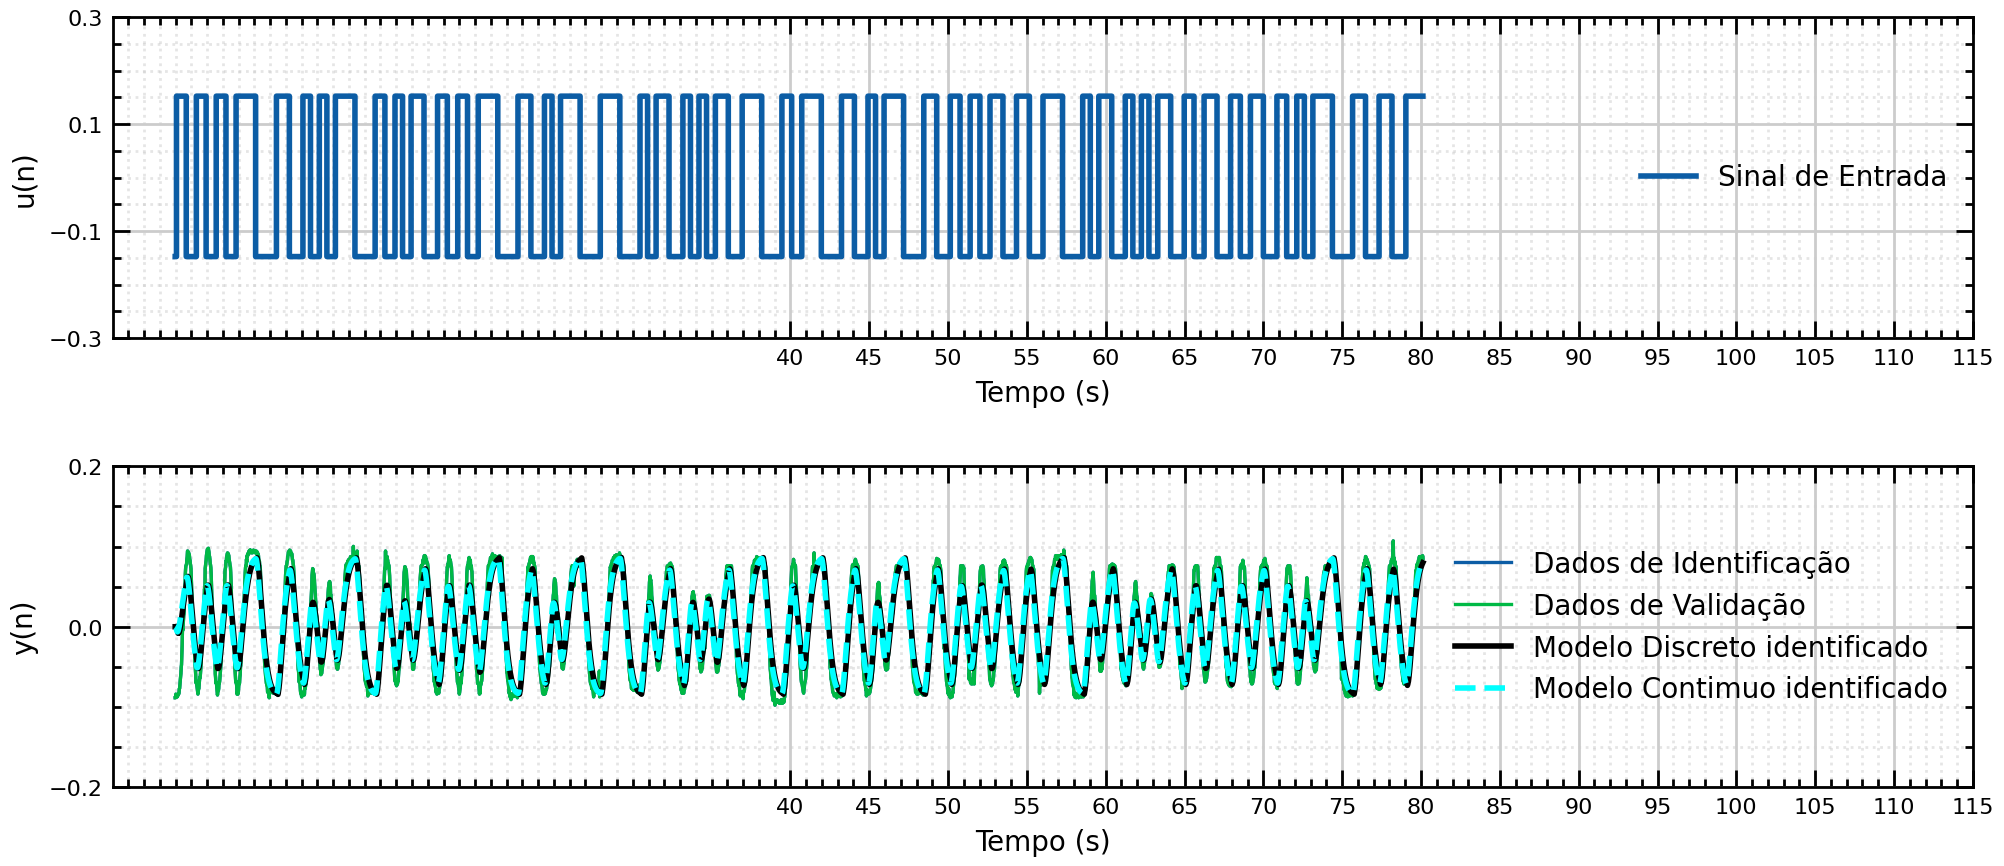

In [18]:
_, yp_z = ct.forced_response(Gz, U=u1)
_, yp_c = ct.forced_response(Gs, U=u1, T=t_t)

#_, yp_mf = ct.forced_response(Gs_mf, U=u1, T=t_t)

plt.figure(figsize = (12, 5))
plt.subplot(211)
plt.step(t, u1, label='Sinal de Entrada')
plt.yticks(np.arange(-0.3, 0.4, 0.2))
plt.ylabel('u(n)')
plt.xlabel('Tempo (s)')
plt.legend(fontsize=10, loc='center right')
plt.xticks(np.arange(40, 120, 5))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t, yout, linewidth = 1.2, label='Dados de Identificação')
plt.plot(t, yout, linewidth = 1.2, label='Dados de Validação')
plt.plot(t, yp_z, 'k', label='Modelo Discreto identificado')
plt.plot(t, yp_c, linestyle='--', color='cyan', label='Modelo Contimuo identificado')
# plt.plot(t, yp_mf, linestyle='--', color='blue', label='Simulação MF')
plt.yticks(np.arange(-0.2, 0.3, 0.2))
plt.legend(fontsize=10, loc='center right')
plt.xticks(np.arange(40, 120, 5))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.xlabel('Tempo (s)')

plt.subplots_adjust(hspace=0.4)
plt.show()


# TESTE GS com contyrolador projetado Cs

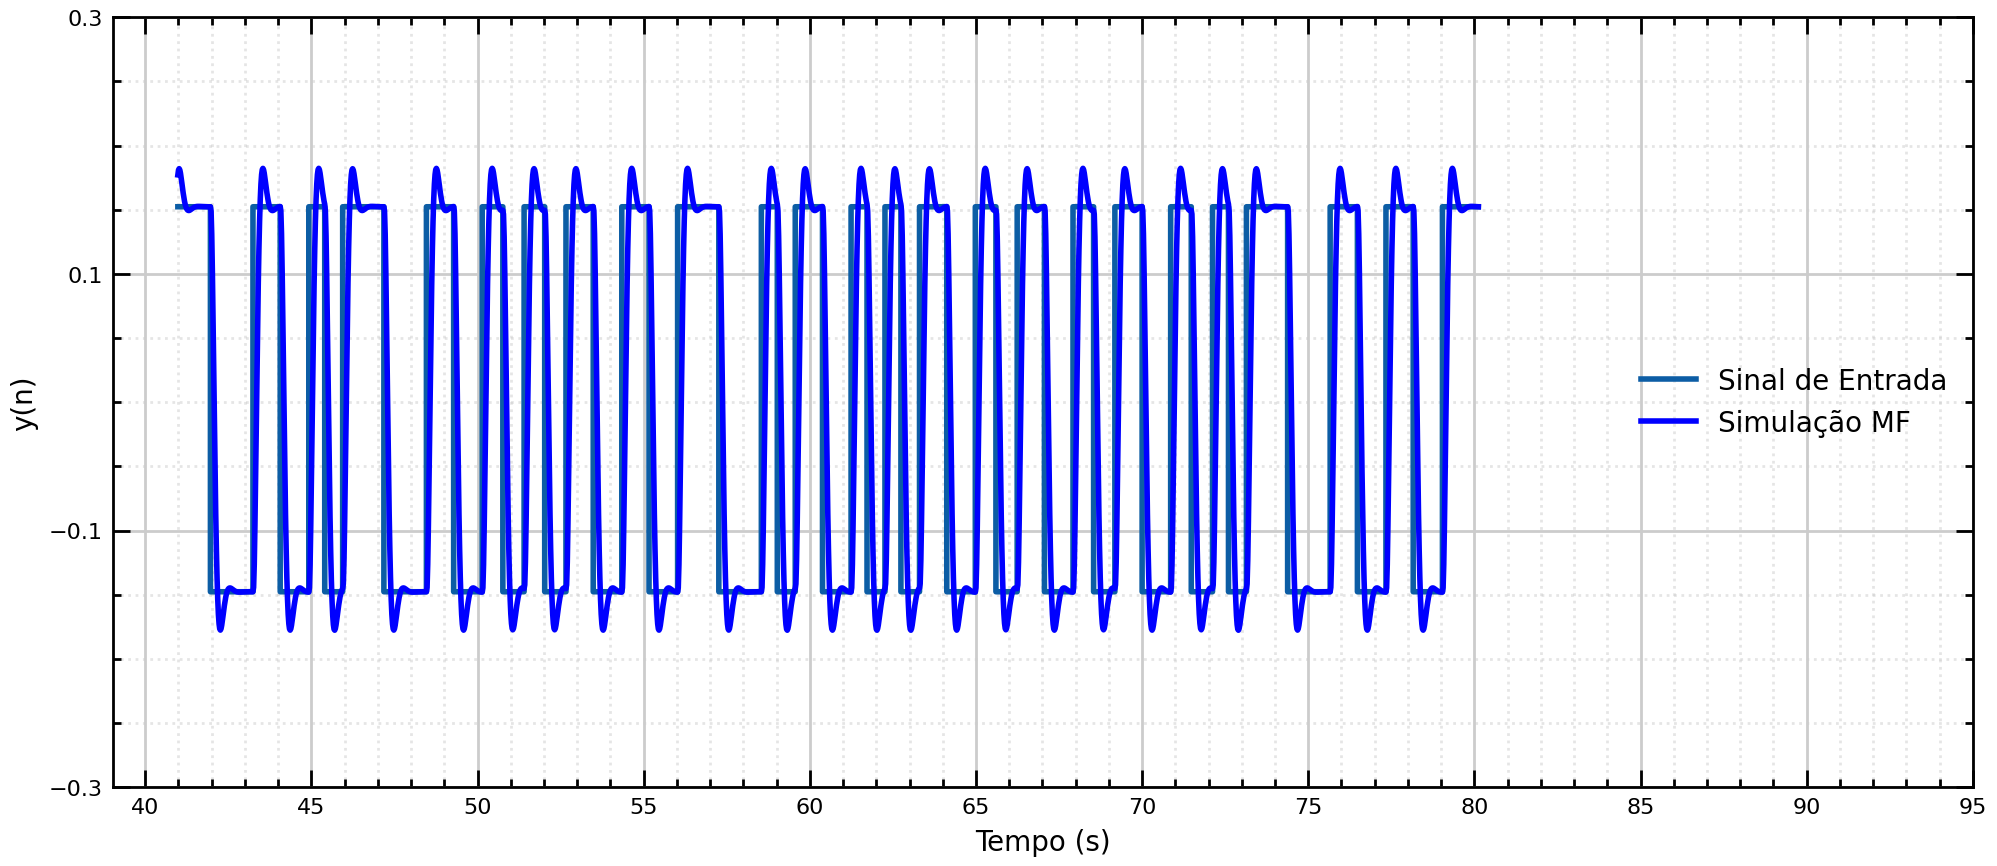

In [30]:
_, yp_mf = ct.forced_response(Gs_mf, U=u1, T=t_t)

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.step(t[2000:], u1[2000:], label='Sinal de Entrada')
plt.plot(t[2000:], yp_mf[2000:], color='blue', label='Simulação MF')
plt.yticks(np.arange(-0.3, 0.4, 0.2))
plt.ylabel('u(n)')
plt.xlabel('Tempo (s)')
plt.legend(fontsize=10, loc='center right')
plt.xticks(np.arange(40, 100, 5))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.xlabel('Tempo (s)')

plt.subplots_adjust(hspace=0.4)
plt.show()


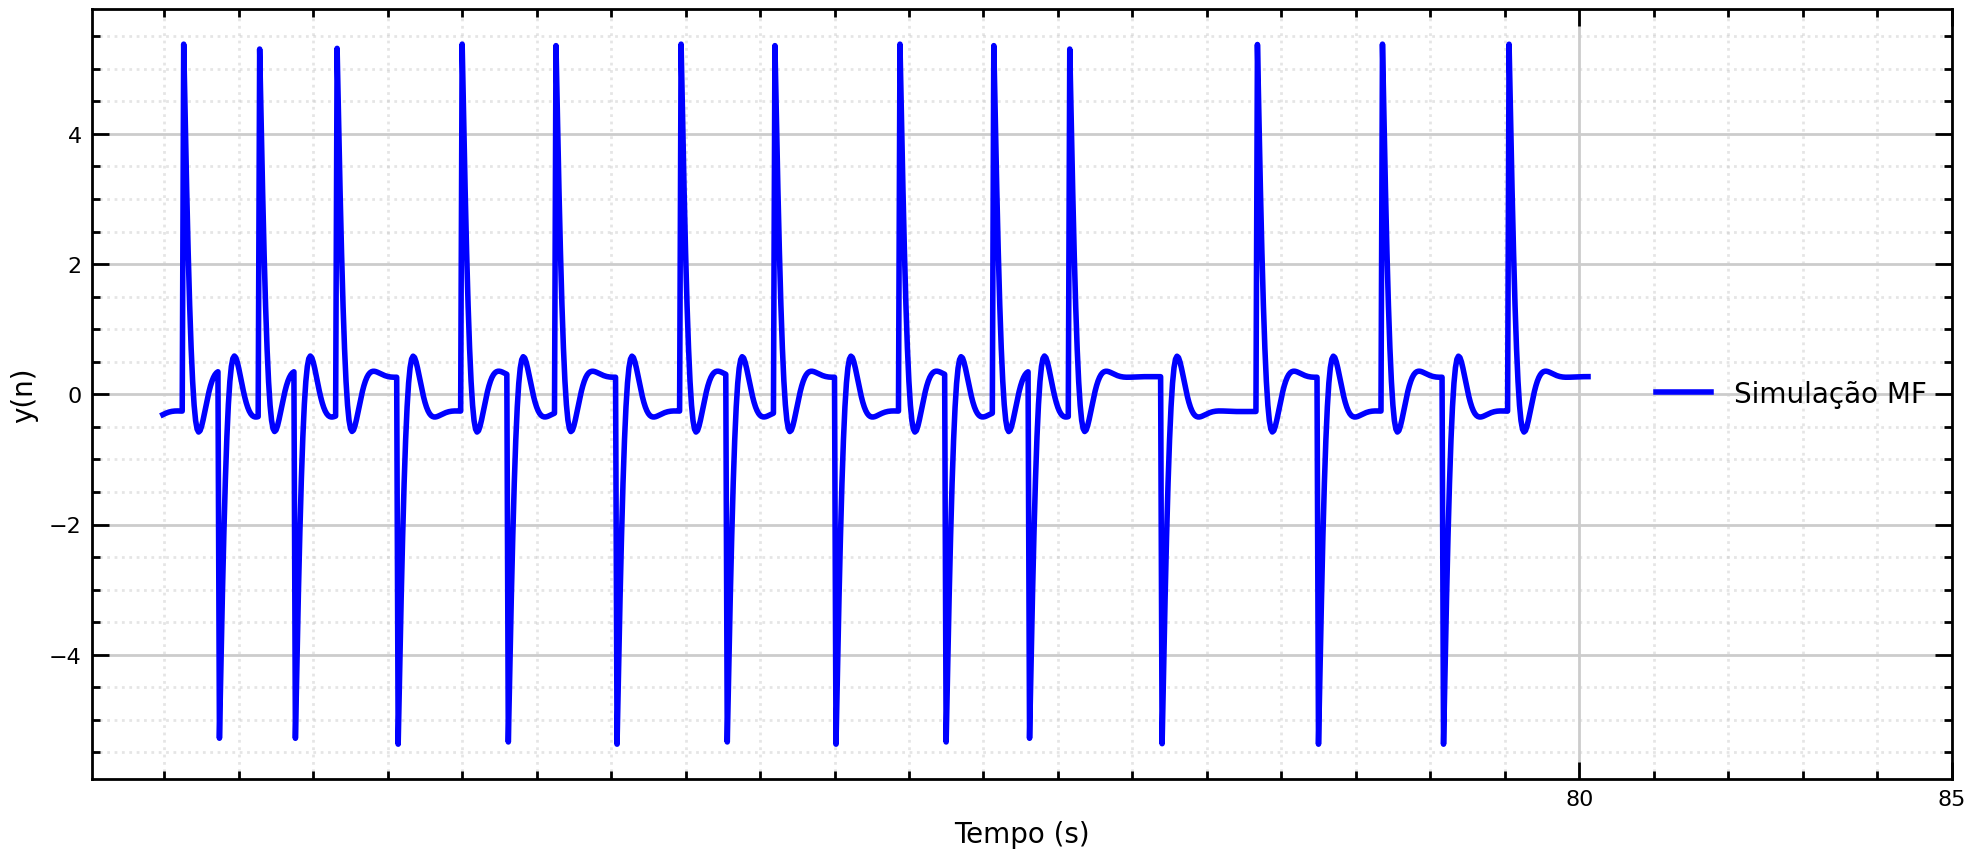

In [40]:
_, yp_mf = ct.forced_response(Cs_ct, U=u1, T=t_t)

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(t[3000:], yp_mf[3000:], color='blue', label='Simulação MF')
#plt.yticks(np.arange(-0.3, 0.4, 0.2))
plt.ylabel('u(n)')
plt.xlabel('Tempo (s)')
plt.legend(fontsize=10, loc='center right')
plt.xticks(np.arange(80, 90, 5))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.xlabel('Tempo (s)')

plt.subplots_adjust(hspace=0.4)
plt.show()


### RMSE - Raiz Do Erro Quadrático Médio 

RMSE (Root Mean Squared Error) é uma medida de erro absoluto que eleva os desvios ao quadrado para impedir que os desvios positivos e negativos se cancelem. Essa medida também tende a superestimar erros grandes, o que pode ajudar a eliminar os métodos com esses erros.

In [14]:
RMSE = mean_squared_error(yout, yp_z, squared=False)

print(f"\nRMSE: {RMSE}\n")


RMSE: 0.01831075042247065



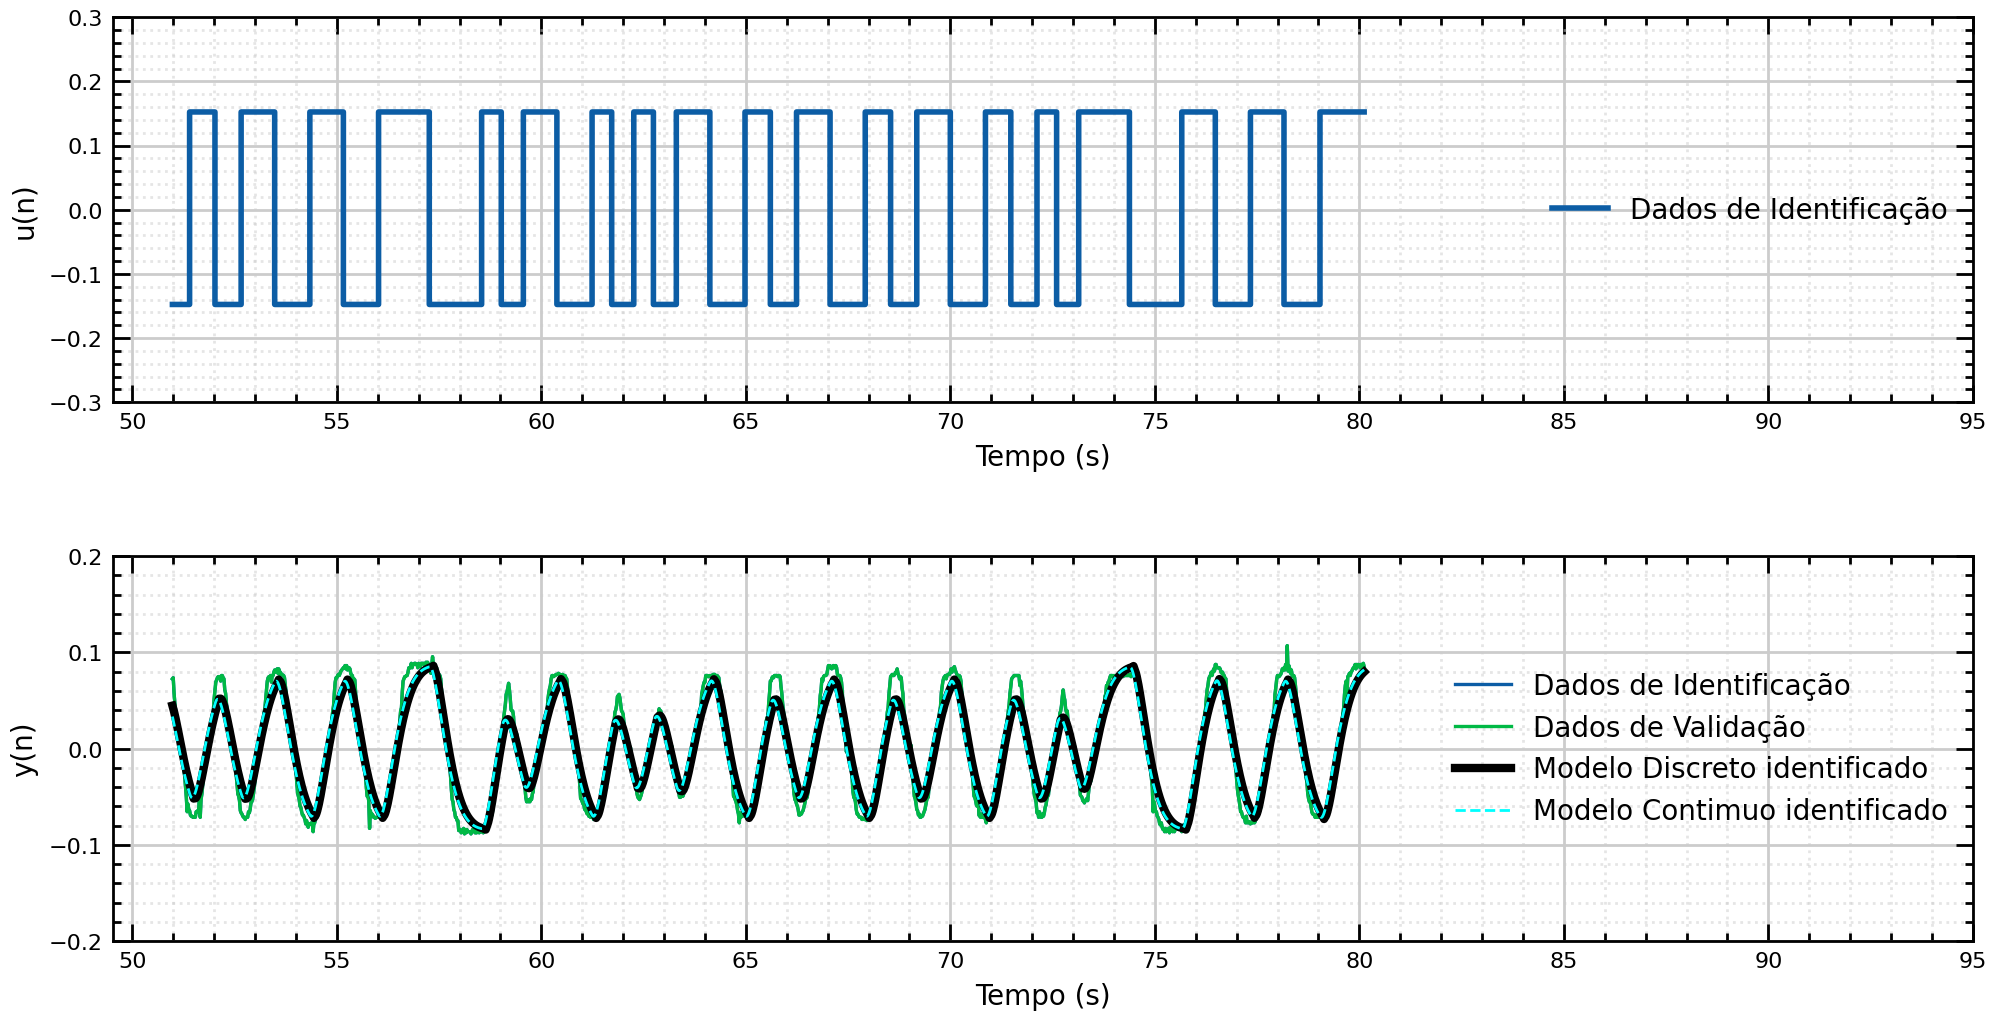

In [15]:
range_ = 2500

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.step(t[range_:], u1[range_:], label='Dados de Identificação')
plt.yticks(np.arange(-0.3, 0.4, 0.1))
plt.ylabel('u(n)')
plt.xlabel('Tempo (s)')
plt.legend(fontsize=10, loc='center right')
plt.xticks(np.arange(50, 100, 5))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[range_:], yout[range_:], linewidth = 1.2, label='Dados de Identificação')
plt.plot(t[range_:], yout[range_:], linewidth = 1.2, label='Dados de Validação')
plt.plot(t[range_:], yp_z[range_:], 'k', linewidth = 3, label='Modelo Discreto identificado')
plt.plot(t[range_:], yp_c[range_:], linestyle='--', color='cyan', linewidth = 1,
         label='Modelo Contimuo identificado')
plt.yticks(np.arange(-0.2, 0.3, 0.1))
plt.legend(fontsize=10, loc='center right')
plt.xticks(np.arange(50, 100, 5))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.xlabel('Tempo (s)')
plt.subplots_adjust(hspace=0.4)
plt.show()
